In [5]:
import pandas as pd
import numpy as np
#import figure
import time 
import matplotlib.pyplot as plt 
import seaborn as sns 







In [6]:
df = pd.read_csv('/Users/dishengliu/Documents/GitHub/feature-selection/mushrooms.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:

X = df.drop(['class'],axis = 1)

Y = df['class']


In [8]:
Y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [9]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


## 对特征进行One-hot 编码（X）

In [10]:
X = pd.get_dummies(X,prefix_sep='_')
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### 进行X标准化处理

In [12]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

## 处理label（Y）


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
Y = LabelEncoder().fit_transform(Y)
print(len(Y))
Y


8124


array([1, 0, 0, ..., 0, 1, 0])

## 分割数据


In [14]:
from sklearn.model_selection import train_test_split 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30,  random_state = 101)
len (X_Train)
len (Y_Train)
len (X_Test)

2438

# RF 可以对特征进行importance rank
#### 得到对模型结果影响大的重要特征
### 从而进行数据features selection

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

start = time.process_time()

trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)

predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))

print('---------------------')
print(classification_report(Y_Test,predictionforest))

print("run %f sec."%(time.process_time() - start))

[[1274    0]
 [   0 1164]]
---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

run 3.811233 sec.


<AxesSubplot:>

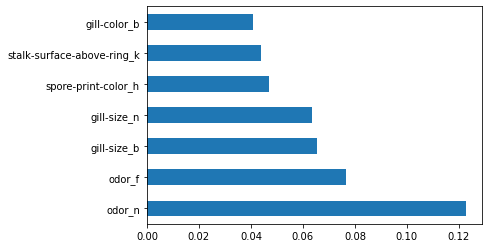

In [16]:
feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [17]:
X_Reduced = X[['odor_n','odor_f', 'gill-size_n','gill-size_b']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30,  random_state = 101)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

2.321282
[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



#### 决策树（单颗）

In [19]:
from sklearn import tree 

start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
print('run %f sec.'%(time.process_time() - start))
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))


run 0.041552 sec.
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [23]:
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz


data = export_graphviz(trainedtree,out_file=None,feature_names= X.columns,
        class_names=['edible', 'poisonous'], 
        filled=True, rounded=True, 
        max_depth=2,
        special_characters=True)
#graph = graphviz.Source(data)
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

# 递归特征消除（RFE）

递归特征消除（RFE）将机器学习模型的实例和要使用的最终期望特征数作为输入。然后，它递归地减少要使用的特征的数量，采用的方法是使用机器学习模型精度作为度量对它们进行排序。  
创建一个 for 循环，其中输入特征的数量是我们的变量，这样就可以通过跟踪在每个循环迭代中注册的精度，找出我们的模型所需的最佳特征数量。使用 RFE 支持方法，我们可以找出被评估为最重要的特征的名称（rfe.support 返回一个布尔列表，其中 true 表示一个特征被视为重要，false 表示一个特征不重要）。

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 4)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe = rfe.fit(RFE_X_Train,Y_Train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_Test))

/Users/dishengliu/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
